In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low= -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
coordinates

[(-83.20759231999779, 8.411443911671483),
 (-86.25399387563075, 9.059047714141144),
 (6.9648283825107455, 175.53634064030746),
 (26.290024727720763, -41.726732425311724),
 (-18.533033640637427, -176.7938178934368),
 (23.208825954968404, 123.04617549289912),
 (-27.4584569137264, -21.51329581341352),
 (-83.66071252848062, -21.600129831203276),
 (-28.097473753511977, 51.86347527361693),
 (33.68607242310361, -55.45512987401413),
 (-69.96254454916343, -88.51119776911588),
 (-82.09270543409684, 113.10296701272023),
 (-3.1787534669372235, 10.622641331266749),
 (75.32071036857047, -120.4292633971659),
 (61.66831434959579, 169.66497580416876),
 (59.6138256540938, 34.43395627226366),
 (-19.984167005854914, -83.76374636780663),
 (-73.45932977031173, -56.02928531371677),
 (84.0665052541558, 4.275512816387476),
 (-12.938311008247624, 163.52895041842783),
 (54.12657415227042, 109.2043539976101),
 (58.236896671653085, -85.24504548818112),
 (75.89612788604808, -107.86506471493622),
 (62.72497035521641

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

605

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Create an empty list to hold the weather data.
city_data = []
#cities = cities[0:10]
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
         # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
            # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
            # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                              "Lat": city_lat,
                              "Lng": city_lng,
                              "Max Temp": city_max_temp,
                              "Humidity": city_humidity,
                              "Cloudiness": city_clouds,
                              "Wind Speed": city_wind,
                              "Country": city_country,
                              "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | butaritari
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | pangai
Processing Record 5 of Set 1 | ishigaki
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | ushuaia
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | saint george
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | mayumba
Processing Record 13 of Set 1 | norman wells
Processing Record 14 of Set 1 | kamenskoye
City not found. Skipping...
Processing Record 15 of Set 1 | yefimovskiy
City not found. Skipping...
Processing Record 16 of Set 1 | pisco
Processing Record 17 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 18 of Set 1 | kirakira
Processing Record 19 of Set 1 | barguzin
Processing Record 20 of Set 1 | attaw

Processing Record 41 of Set 4 | mtwara
Processing Record 42 of Set 4 | pella
Processing Record 43 of Set 4 | singaraja
Processing Record 44 of Set 4 | xique-xique
Processing Record 45 of Set 4 | san rafael
Processing Record 46 of Set 4 | hithadhoo
Processing Record 47 of Set 4 | asau
Processing Record 48 of Set 4 | novobureyskiy
Processing Record 49 of Set 4 | tiarei
Processing Record 50 of Set 4 | santa maria
Processing Record 1 of Set 5 | mangrol
Processing Record 2 of Set 5 | salekhard
Processing Record 3 of Set 5 | merauke
Processing Record 4 of Set 5 | comodoro rivadavia
Processing Record 5 of Set 5 | muhos
Processing Record 6 of Set 5 | naze
Processing Record 7 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 8 of Set 5 | nanpiao
Processing Record 9 of Set 5 | komatipoort
Processing Record 10 of Set 5 | thurso
Processing Record 11 of Set 5 | saint anthony
Processing Record 12 of Set 5 | northam
Processing Record 13 of Set 5 | burica
City not found. Skipping...
Pro

Processing Record 31 of Set 8 | buraydah
Processing Record 32 of Set 8 | la ronge
Processing Record 33 of Set 8 | princeton
Processing Record 34 of Set 8 | adrar
Processing Record 35 of Set 8 | rongcheng
Processing Record 36 of Set 8 | grindavik
Processing Record 37 of Set 8 | nelson bay
Processing Record 38 of Set 8 | aracoiaba
Processing Record 39 of Set 8 | kloulklubed
Processing Record 40 of Set 8 | san jose de guanipa
Processing Record 41 of Set 8 | yulara
Processing Record 42 of Set 8 | chernyy yar
Processing Record 43 of Set 8 | nikolskoye
Processing Record 44 of Set 8 | vao
Processing Record 45 of Set 8 | surt
Processing Record 46 of Set 8 | guozhen
Processing Record 47 of Set 8 | bambanglipuro
Processing Record 48 of Set 8 | cabedelo
Processing Record 49 of Set 8 | dembi dolo
Processing Record 50 of Set 8 | kirkwall
Processing Record 1 of Set 9 | tutoia
Processing Record 2 of Set 9 | coahuayana
Processing Record 3 of Set 9 | tavrichanka
Processing Record 4 of Set 9 | rudnichny

Processing Record 19 of Set 12 | emerald
Processing Record 20 of Set 12 | dom pedro
Processing Record 21 of Set 12 | xiongzhou
Processing Record 22 of Set 12 | kruisfontein
Processing Record 23 of Set 12 | sorland
Processing Record 24 of Set 12 | altoona
Processing Record 25 of Set 12 | ulladulla
Processing Record 26 of Set 12 | akyab
Processing Record 27 of Set 12 | jutai
Processing Record 28 of Set 12 | temir
Processing Record 29 of Set 12 | kambove
Processing Record 30 of Set 12 | zverinogolovskoye
Processing Record 31 of Set 12 | santa eulalia del rio
City not found. Skipping...
Processing Record 32 of Set 12 | pacific grove
Processing Record 33 of Set 12 | beloha
Processing Record 34 of Set 12 | monywa
Processing Record 35 of Set 12 | yurga
Processing Record 36 of Set 12 | safwah
City not found. Skipping...
Processing Record 37 of Set 12 | valera
Processing Record 38 of Set 12 | inhambane
Processing Record 39 of Set 12 | jiangyou
Processing Record 40 of Set 12 | kutum
Processing R

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,66.79,67,98,3.15,ZA,2022-03-27 22:52:01
1,Butaritari,3.0707,172.7902,81.03,65,90,7.67,KI,2022-03-27 22:56:42
2,Ribeira Grande,38.5167,-28.7000,60.15,85,100,16.98,PT,2022-03-27 22:53:04
3,Pangai,-19.8000,-174.3500,82.51,69,75,8.05,TO,2022-03-27 22:56:42
4,Ishigaki,24.3448,124.1572,68.13,100,100,17.27,JP,2022-03-27 22:56:43


In [10]:
# Reorder the columns as City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, Windspeed
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity","Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hermanus,ZA,2022-03-27 22:52:01,-34.4187,19.2345,66.79,67,98,3.15
1,Butaritari,KI,2022-03-27 22:56:42,3.0707,172.7902,81.03,65,90,7.67
2,Ribeira Grande,PT,2022-03-27 22:53:04,38.5167,-28.7000,60.15,85,100,16.98
3,Pangai,TO,2022-03-27 22:56:42,-19.8000,-174.3500,82.51,69,75,8.05
4,Ishigaki,JP,2022-03-27 22:56:43,24.3448,124.1572,68.13,100,100,17.27


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

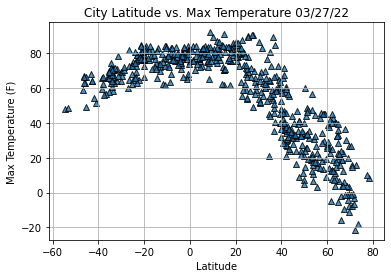

In [13]:
# Import time module
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, max_temps, edgecolor ="black", linewidth = 1, marker ="^",alpha =0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


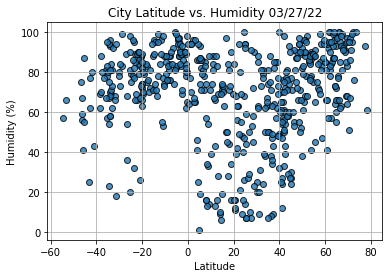

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

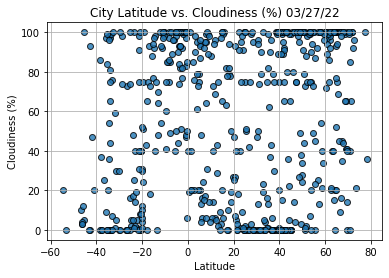

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

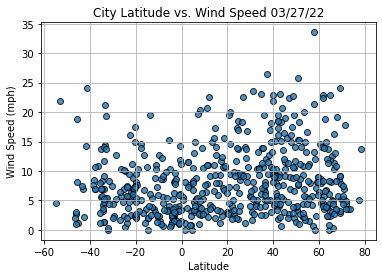

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
plot_linear_regression(x_values, y_values, title, y_label, text_coordinates)

NameError: name 'x_values' is not defined

In [20]:
index13 = city_data_df.loc[13]
index13

City                     Kirakira
Country                        SB
Date          2022-03-27 22:56:44
Lat                      -10.4544
Lng                      161.9205
Max Temp                    83.82
Humidity                       74
Cloudiness                    100
Wind Speed                   2.13
Name: 13, dtype: object

In [21]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Butaritari,KI,2022-03-27 22:56:42,3.0707,172.7902,81.03,65,90,7.67
2,Ribeira Grande,PT,2022-03-27 22:53:04,38.5167,-28.7000,60.15,85,100,16.98
4,Ishigaki,JP,2022-03-27 22:56:43,24.3448,124.1572,68.13,100,100,17.27
5,Jamestown,US,2022-03-27 22:52:01,42.0970,-79.2353,20.71,61,100,18.41
7,Saint George,US,2022-03-27 22:56:43,37.1041,-113.5841,84.63,9,79,11.99


In [22]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

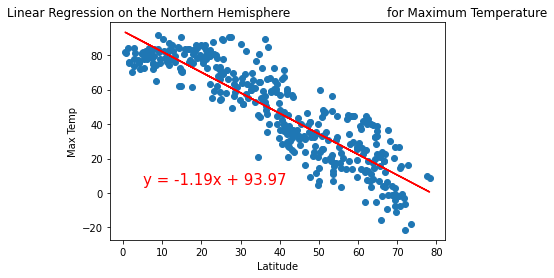

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(5,5))

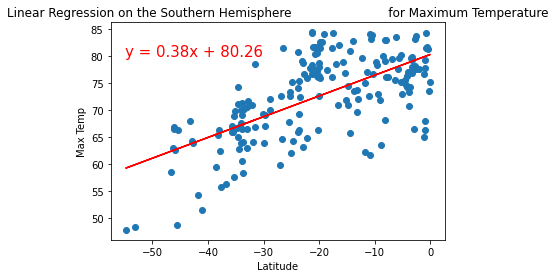

In [51]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-55,80))


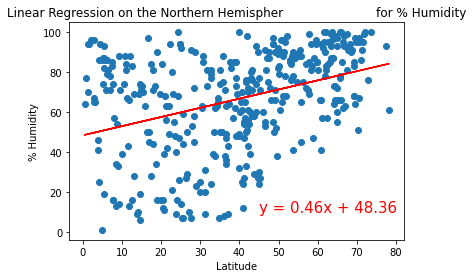

In [54]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemispher\
                        for % Humidity', '% Humidity',(45,10))

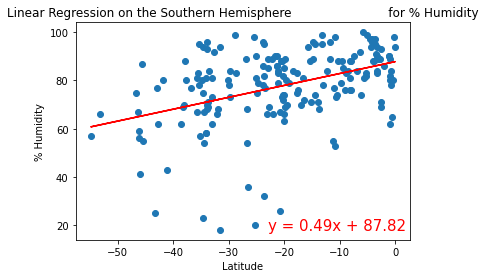

In [64]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-23,18))

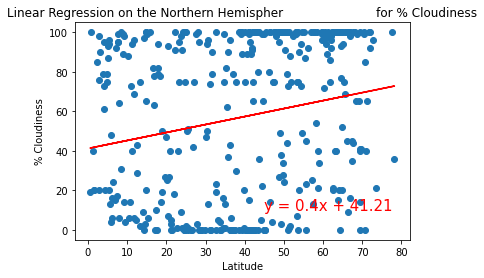

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemispher\
                        for % Cloudiness', '% Cloudiness',(45,10))

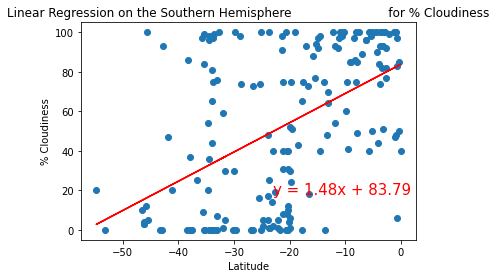

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-23,18))

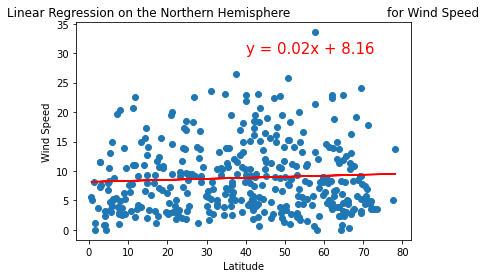

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,30))


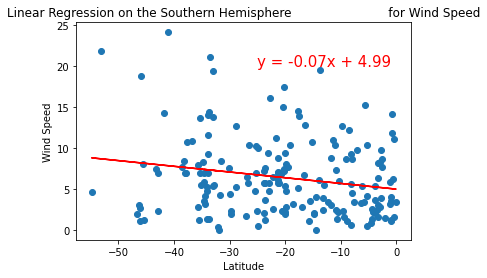

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-25,20))
